# Oficina 7 

## 0.0 - Objetivo

O objetivo é analisar visualmente o dataset com dados dos passageiros do navio Titanic. 

Será observado dados referentes ao valor da passagem, cidade de embarque, sobreviventes e o sexo dos passageiros.

## 1.0 - Importações

### 1.1 - Importando biblioteca

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2 - Importando dataset

In [3]:
df_titanic = sns.load_dataset('titanic')

In [4]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2.0 - Análises 

### 2.1 - Análise informativa

In [20]:
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [65]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Nessa primeira análise observamos que há algumas variáveis com dados nulos. Como a análise será feita sobre variáveis em específico, uma alternativa é derivar um dataset apenas com tais variáveis e fazer uma limpeza mais direta

In [74]:
df_titanic2 = df_titanic[['survived', 'embark_town', 'fare', 'sex']]

In [75]:
df_titanic2.isnull().sum()

survived       0
embark_town    2
fare           0
sex            0
dtype: int64

Como há apenas 2 valores nulos em 'embark_town', podemos utilizar `dropn` para remover os valores.

In [79]:
df_titanic2.dropna(subset=['embark_town'], inplace=True)

<ipython-input-79-8b724dfb9ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic2.dropna(subset=['embark_town'], inplace=True)


Esse erro aconteceu porque a "cópia" que fizemos do dataset foi na verdade a cópia do endereço de memória para aquelas colunas, ou seja, ao tentarmos mudar df_titanic2, estamos tentando alterar o dataset original.

O ideal seria ter feito `df_titanic2 = df_titanic[['survived', 'embark_town', 'fare', 'sex']].copy()`

In [114]:
df3 = df_titanic.copy()

In [80]:
df_titanic2.isnull().sum()

survived       0
embark_town    0
fare           0
sex            0
dtype: int64

### 2.2 - Análise descritiva 

In [81]:
df_titanic2.describe()

,survived,fare
count,889.000000,889.000000
mean,0.382452,32.096681
std,0.486260,49.697504
min,0.000000,0.000000
25%,0.000000,7.895800
50%,0.000000,14.454200
75%,1.000000,31.000000
max,1.000000,512.329200


**Analisando preço da passagem por cidade**

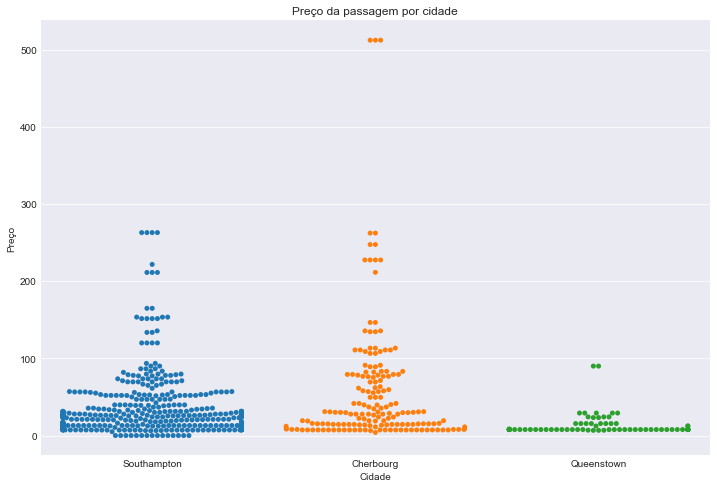

In [106]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-darkgrid')
sns.swarmplot(x='embark_town', y = 'fare', data=df_titanic2)
plt.title('Preço da passagem por cidade')
plt.xlabel('Cidade')
plt.ylabel('Preço')
plt.show()

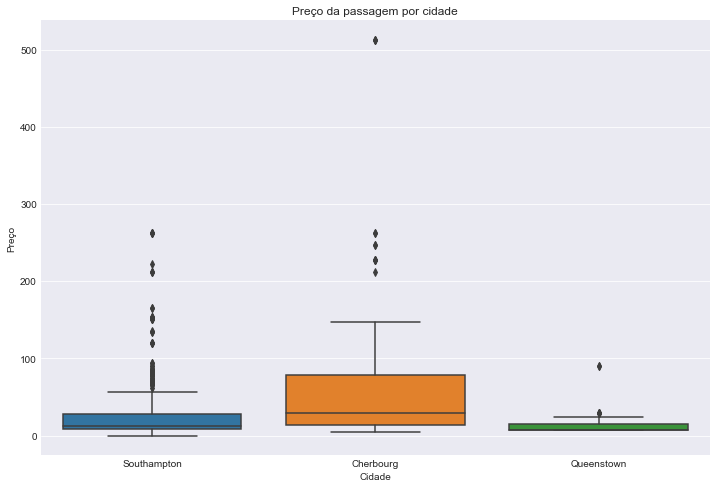

In [108]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-darkgrid')
sns.boxplot(x='embark_town', y = 'fare', data=df_titanic2)
plt.title('Preço da passagem por cidade')
plt.xlabel('Cidade')
plt.ylabel('Preço')
plt.show()

**Analisando características entre sobreviventes e não sobreviventes**

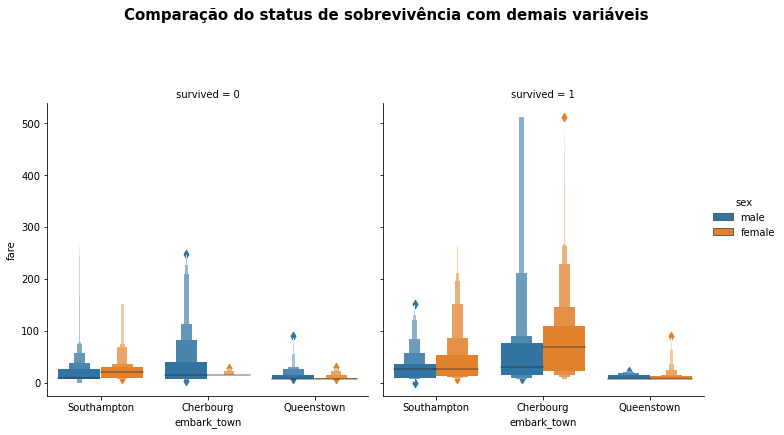

In [98]:
a = sns.catplot(x='embark_town', y='fare', hue='sex', col='survived', kind='boxen', data=df_titanic2)
a.fig.suptitle('Comparação do status de sobrevivência com demais variáveis', x=0.5, y = 1.2, size=15, weight='black')
plt.show()

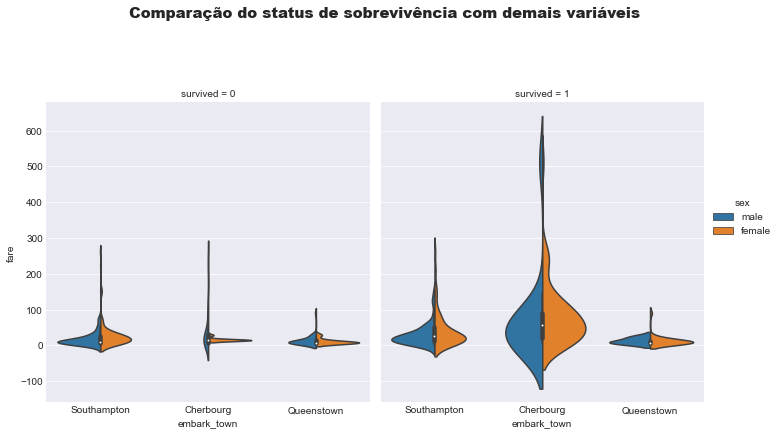

In [112]:
a = sns.catplot(x='embark_town', y='fare', hue='sex', col='survived', kind='violin', split=True,  data=df_titanic2)
a.fig.suptitle('Comparação do status de sobrevivência com demais variáveis', x=0.5, y = 1.2, size=15, weight='black')
plt.show()

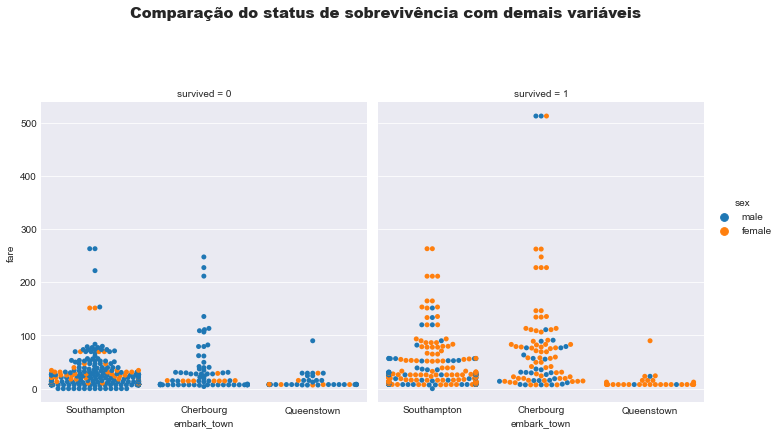

In [113]:
a = sns.catplot(x='embark_town', y='fare', hue='sex', col='survived', kind='swarm', data=df_titanic2)
a.fig.suptitle('Comparação do status de sobrevivência com demais variáveis', x=0.5, y = 1.2, size=15, weight='black')
plt.show()

**Análise**

Observa-se que entre os sobreviventes, a grande maioria do sexo feminino, enquanto que no grupo dos não sobreviventes, a maioria é do sexo masculino.

Nota-se também entre os sobreviventes, o valor das passagens se dispersão mais entre os intervalos, o que pode indicar que quem pagou um valor mais elevado, teve mais chances de sobrevivência, apesar de não ter uma grande diferença na quantidade em relação a esses grupos